In [1]:
import pandas as pd

world_gym = pd.read_excel("world_gym_sem_nomes.xlsx")
world_gym.head()

datetime  name       unit  age gender  \
0 2023-06-13 16:46:47.727   NaN       Gama   40  Homem   
1 2023-06-13 16:48:08.581   NaN  Asa Norte   44  Homem   
2 2023-06-13 16:48:17.491   NaN  Asa Norte   27  Homem   
3 2023-06-13 16:48:24.856   NaN     Itapoã   28  Homem   
4 2023-06-13 16:48:26.981   NaN  Asa Norte   36  Homem   

                         RA time_of_day  days_per_week  time_spent  \
0                      Gama       Noite              6          80   
1  Plano Piloto - Asa Norte       Manhã              5          50   
2  Plano Piloto - Asa Norte       Noite              5          90   
3                   Paranoá       Manhã              6          40   
4    Plano Piloto - Asa Sul       Noite              3          40   

                                          objectives          activities  \
0                                      Hipertrofia,   Musculação, Cardio   
1  Hipertrofia, Hobby, Elevar autoestima e cuidar...  Musculação, Cardio   
2                   Hipertrofia, Recomendação Médica          Musculação   
3  Emagrecimento, Recomendação Médica, Hobby, Ele...   Musculação, Lutas   
4                                    Motivos Sociais          Musculação   

                                            requests  \
0  Um programa com atendimento personalizado de p...   
1  Aulas coletivas bem diferentes, Reconhecimento...   
2  Um programa com atendimento personalizado de p...   
3                Estou bem satisfeito(a), na verdade   
4  Um programa com atendimento personalizado de p...   

                                             comment  
0        A academia precisa de mais equipamentos...   
1  Acho que a unidade da asa norte não tem espaço...  
2  Acho que poderiam orientar melhor os professor...  
3                                                NaN  
4  Acredito que deveria ter mais aparelhos repeti...

In [2]:
world_gym = world_gym.drop(["name","datetime","comment"], axis=1)
world_gym.head()

unit  age gender                        RA time_of_day  days_per_week  \
0       Gama   40  Homem                      Gama       Noite              6   
1  Asa Norte   44  Homem  Plano Piloto - Asa Norte       Manhã              5   
2  Asa Norte   27  Homem  Plano Piloto - Asa Norte       Noite              5   
3     Itapoã   28  Homem                   Paranoá       Manhã              6   
4  Asa Norte   36  Homem    Plano Piloto - Asa Sul       Noite              3   

   time_spent                                         objectives  \
0          80                                      Hipertrofia,    
1          50  Hipertrofia, Hobby, Elevar autoestima e cuidar...   
2          90                   Hipertrofia, Recomendação Médica   
3          40  Emagrecimento, Recomendação Médica, Hobby, Ele...   
4          40                                    Motivos Sociais   

           activities                                           requests  
0  Musculação, Cardio  Um programa com atendimento personalizado de p...  
1  Musculação, Cardio  Aulas coletivas bem diferentes, Reconhecimento...  
2          Musculação  Um programa com atendimento personalizado de p...  
3   Musculação, Lutas                Estou bem satisfeito(a), na verdade  
4          Musculação  Um programa com atendimento personalizado de p...

In [3]:
world_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   unit           525 non-null    object
 1   age            525 non-null    int64 
 2   gender         525 non-null    object
 3   RA             525 non-null    object
 4   time_of_day    525 non-null    object
 5   days_per_week  525 non-null    int64 
 6   time_spent     525 non-null    int64 
 7   objectives     525 non-null    object
 8   activities     525 non-null    object
 9   requests       525 non-null    object
dtypes: int64(3), object(7)
memory usage: 41.1+ KB


In [4]:
world_gym.describe()

age  days_per_week  time_spent
count  525.000000     525.000000  525.000000
mean    37.253333       4.752381   84.379048
std     11.406215       1.158943   32.954096
min     14.000000       1.000000    2.000000
25%     29.000000       4.000000   60.000000
50%     36.000000       5.000000   80.000000
75%     44.000000       5.000000  120.000000
max     78.000000       7.000000  350.000000

In [5]:
world_gym[world_gym["time_spent"] == 2]

unit  age  gender         RA time_of_day  days_per_week  \
36  Samambaia - Norte   28  Mulher  Samambaia       Manhã              4   

    time_spent                  objectives          activities  \
36           2  Hipertrofia, Emagrecimento  Musculação, Cardio   

                                             requests  
36  Um programa com atendimento personalizado de p...

In [6]:
world_gym.iloc[36,6] = 120

world_gym.describe()

age  days_per_week  time_spent
count  525.000000     525.000000  525.000000
mean    37.253333       4.752381   84.603810
std     11.406215       1.158943   32.793175
min     14.000000       1.000000   30.000000
25%     29.000000       4.000000   60.000000
50%     36.000000       5.000000   80.000000
75%     44.000000       5.000000  120.000000
max     78.000000       7.000000  350.000000

In [7]:
morning = []
for i in list(world_gym["time_of_day"]):
    if "Manhã" in i:
        morning.append(True)
    else:
        morning.append(False)
world_gym["Manhã"] = morning

afternoon = []
for i in list(world_gym["time_of_day"]):
    if "Tarde" in i:
        afternoon.append(True)
    else:
        afternoon.append(False)
world_gym["Tarde"] = afternoon

night = []
for i in list(world_gym["time_of_day"]):
    if "Noite" in i:
        night.append(True)
    else:
        night.append(False)
world_gym["Noite"] = night

world_gym.head()

unit  age gender                        RA time_of_day  days_per_week  \
0       Gama   40  Homem                      Gama       Noite              6   
1  Asa Norte   44  Homem  Plano Piloto - Asa Norte       Manhã              5   
2  Asa Norte   27  Homem  Plano Piloto - Asa Norte       Noite              5   
3     Itapoã   28  Homem                   Paranoá       Manhã              6   
4  Asa Norte   36  Homem    Plano Piloto - Asa Sul       Noite              3   

   time_spent                                         objectives  \
0          80                                      Hipertrofia,    
1          50  Hipertrofia, Hobby, Elevar autoestima e cuidar...   
2          90                   Hipertrofia, Recomendação Médica   
3          40  Emagrecimento, Recomendação Médica, Hobby, Ele...   
4          40                                    Motivos Sociais   

           activities                                           requests  \
0  Musculação, Cardio  Um programa com atendimento personalizado de p...   
1  Musculação, Cardio  Aulas coletivas bem diferentes, Reconhecimento...   
2          Musculação  Um programa com atendimento personalizado de p...   
3   Musculação, Lutas                Estou bem satisfeito(a), na verdade   
4          Musculação  Um programa com atendimento personalizado de p...   

   Manhã  Tarde  Noite  
0  False  False   True  
1   True  False  False  
2  False  False   True  
3   True  False  False  
4  False  False   True

<Axes: >

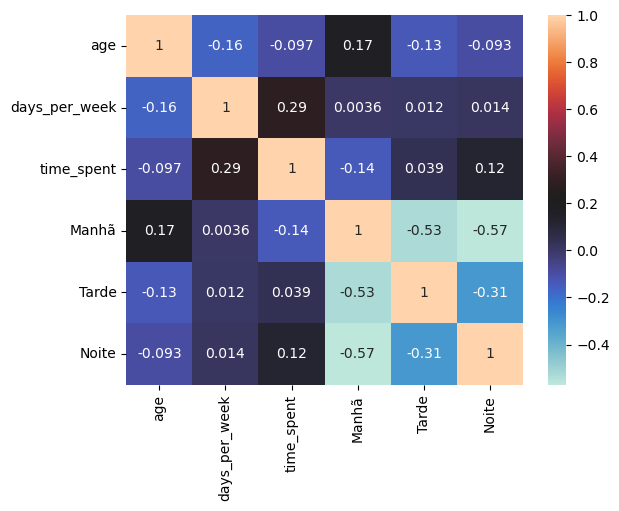

In [8]:
import seaborn as sns

corr_matrix = world_gym.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True,
            cmap=sns.color_palette("icefire", as_cmap=True))

In [9]:
unit_count = world_gym["unit"].value_counts()
unit_count

Samambaia - Norte    127
Asa Norte            101
Gama                  99
Planaltina/GO         79
Itapoã                62
Arniqueira            57
Name: unit, dtype: int64

([<matplotlib.patches.Wedge at 0x1a97a25beb0>,
 [Text(0.7973451998859055, 0.7577866666938035, 'Samambaia - Norte'),
  Text(-0.5782521597246161, 0.9357480642639968, 'Asa Norte'),
  Text(-1.0823225495601467, -0.19641257269743165, 'Gama'),
  Text(-0.3524145293676332, -1.042019193436757, 'Planaltina/GO'),
  Text(0.5442896405714993, -0.9559020803233709, 'Itapoã'),
  Text(1.0366306813205548, -0.3679630831277544, 'Arniqueira')],
 [Text(0.4349155635741302, 0.4133381818329837, '24.19%'),
  Text(-0.3154102689406997, 0.5104080350530892, '19.24%'),
  Text(-0.5903577543055345, -0.10713413056223543, '18.86%'),
  Text(-0.1922261069277999, -0.5683741055109583, '15.05%'),
  Text(0.296885258493545, -0.5214011347218386, '11.81%'),
  Text(0.5654349170839389, -0.20070713625150235, '10.86%')])

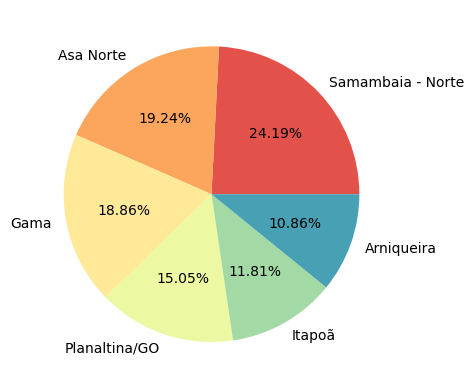

In [10]:
import matplotlib.pyplot as plt

plt.pie(unit_count, labels=unit_count.index,
        colors=sns.color_palette("Spectral",n_colors=6),
        autopct='%1.2f%%')

In [11]:
man = []
woman = []

for i in list(world_gym["gender"]):
    if "Homem" in i:
        man.append(True)
        woman.append(False)
    else:
        man.append(False)
        woman.append(True)

world_gym["Homem"] = man
world_gym["Mulher"] = woman
world_gym.head()

unit  age gender                        RA time_of_day  days_per_week  \
0       Gama   40  Homem                      Gama       Noite              6   
1  Asa Norte   44  Homem  Plano Piloto - Asa Norte       Manhã              5   
2  Asa Norte   27  Homem  Plano Piloto - Asa Norte       Noite              5   
3     Itapoã   28  Homem                   Paranoá       Manhã              6   
4  Asa Norte   36  Homem    Plano Piloto - Asa Sul       Noite              3   

   time_spent                                         objectives  \
0          80                                      Hipertrofia,    
1          50  Hipertrofia, Hobby, Elevar autoestima e cuidar...   
2          90                   Hipertrofia, Recomendação Médica   
3          40  Emagrecimento, Recomendação Médica, Hobby, Ele...   
4          40                                    Motivos Sociais   

           activities                                           requests  \
0  Musculação, Cardio  Um programa com atendimento personalizado de p...   
1  Musculação, Cardio  Aulas coletivas bem diferentes, Reconhecimento...   
2          Musculação  Um programa com atendimento personalizado de p...   
3   Musculação, Lutas                Estou bem satisfeito(a), na verdade   
4          Musculação  Um programa com atendimento personalizado de p...   

   Manhã  Tarde  Noite  Homem  Mulher  
0  False  False   True   True   False  
1   True  False  False   True   False  
2  False  False   True   True   False  
3   True  False  False   True   False  
4  False  False   True   True   False

In [12]:
gender_cat = world_gym[["gender"]]
gender_cat.head(10)

gender
0   Homem
1   Homem
2   Homem
3   Homem
4   Homem
5   Homem
6  Mulher
7   Homem
8   Homem
9  Mulher

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
gender_cat = ordinal_encoder.fit_transform(gender_cat)
gender_cat[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [14]:
world_gym["gender_ord"] = gender_cat

In [15]:
world_gym.head(10)

unit  age  gender                        RA time_of_day  \
0       Gama   40   Homem                      Gama       Noite   
1  Asa Norte   44   Homem  Plano Piloto - Asa Norte       Manhã   
2  Asa Norte   27   Homem  Plano Piloto - Asa Norte       Noite   
3     Itapoã   28   Homem                   Paranoá       Manhã   
4  Asa Norte   36   Homem    Plano Piloto - Asa Sul       Noite   
5       Gama   31   Homem                      Gama       Manhã   
6  Asa Norte   39  Mulher  Plano Piloto - Asa Norte       Manhã   
7       Gama   42   Homem                      Gama       Tarde   
8     Itapoã   38   Homem                    Itapoã       Manhã   
9     Itapoã   30  Mulher                    Itapoã       Manhã   

   days_per_week  time_spent  \
0              6          80   
1              5          50   
2              5          90   
3              6          40   
4              3          40   
5              5          75   
6              5          45   
7              3          90   
8              5          50   
9              3          50   

                                          objectives          activities  \
0                                      Hipertrofia,   Musculação, Cardio   
1  Hipertrofia, Hobby, Elevar autoestima e cuidar...  Musculação, Cardio   
2                   Hipertrofia, Recomendação Médica          Musculação   
3  Emagrecimento, Recomendação Médica, Hobby, Ele...   Musculação, Lutas   
4                                    Motivos Sociais          Musculação   
5                                        Hipertrofia  Musculação, Cardio   
6  Hipertrofia, Emagrecimento, Elevar autoestima ...  Musculação, Cardio   
7                         Hipertrofia, Emagrecimento          Musculação   
8                         Hipertrofia, Emagrecimento  Musculação, Cardio   
9         Elevar autoestima e cuidar da saúde mental          Musculação   

                                            requests  Manhã  Tarde  Noite  \
0  Um programa com atendimento personalizado de p...  False  False   True   
1  Aulas coletivas bem diferentes, Reconhecimento...   True  False  False   
2  Um programa com atendimento personalizado de p...  False  False   True   
3                Estou bem satisfeito(a), na verdade   True  False  False   
4  Um programa com atendimento personalizado de p...  False  False   True   
5  Reconhecimento facial no acesso, Minha unidade...   True  False  False   
6  Estou bem satisfeito(a), na verdade, Nada diss...   True  False  False   
7  Reconhecimento facial no acesso, Uma loja com ...  False   True  False   
8                Estou bem satisfeito(a), na verdade   True  False  False   
9                          Minha unidade aberta 24hs   True  False  False   

   Homem  Mulher  gender_ord  
0   True   False         0.0  
1   True   False         0.0  
2   True   False         0.0  
3   True   False         0.0  
4   True   False         0.0  
5   True   False         0.0  
6  False    True         1.0  
7   True   False         0.0  
8   True   False         0.0  
9  False    True         1.0

In [16]:
x = world_gym.iloc[:, [1,-1]]
x[:5]

age  gender_ord
0   40         0.0
1   44         0.0
2   27         0.0
3   28         0.0
4   36         0.0

In [17]:
list_times = world_gym["time_of_day"].value_counts()
list_times

Manhã                  262
Noite                  134
Tarde                  114
Manhã, Noite             8
Manhã, Tarde             4
Tarde, Noite             2
Manhã, Tarde, Noite      1
Name: time_of_day, dtype: int64

In [18]:
timeday_cat = world_gym[["gender"]]

ordinal_encoder = OrdinalEncoder(categories=[1,2,3,4,5,6,7])

timeday_cat = ordinal_encoder.fit_transform(timeday_cat)
timeday_cat[:10]

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).